In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('max_columns', None)

In [3]:
data = pd.read_csv("finaldata.csv")
dataframe2 = pd.read_csv("finaldata.csv")
dataframe3 = pd.read_csv("finaldata.csv")

In [4]:
data.head()

,UNITID,TYPE,FORPROFIT,StudyAbroad,TUITVARY,ROOM,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,TUITION2_INSTATE_UG,FEE2_INSTATE_UG,TUITION3_OUTSTATE_UG,FEE3_OUTOFSTATE_UG,INSTATE_TUITION_FEES_P,OUTSTATE_TUITION_FEES_P,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REUIRED_GPA,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,NUM_FULLTIME_FALLCOHRT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,TOTAL_FIRSTYR_UG,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,TOTAL_AID_UG,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TOTAL_AMOUNT_FLOANS_UG,TOTAL_SALARY_FT_CONTRACT,DUAL_ENROLLMENT,AP_CREDIT,TEACHER_CERT,COUNSELING_SERVICES,EMPLOYMENT_SERVICE,ACADEMIC_LIBRARY,TUITION_GURANTEE,TUITION_PAYMENTPLAN,ATHASSOC,TOTAL_ASSETS,TOTAL_LIABILITIES,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,TOTAL_PELL,STATEGRANT,LOCAL_GRANT,DISCOUNTSAPPLIED_TO_TUTFEES,Highest_Bachelor,STATE_SOUTH
0,100654,1,0,1,1,1,1,8610,1414,8610,1414,17220,1414,10024,18634,3090,3440,1,0,9855,1688,54,18,1688,32,87,45409382,71,19916507,75,28131849,1.610014e+07,1,1,1,1,1,1,0,1,1,278440664,263028799,7257779,27527791,18427393,176182,0,22985068,0,1
1,100706,1,0,1,1,1,1,9730,1608,9730,1608,22126,1608,11338,23734,4076,4076,1,0,5793,1489,82,19,1489,19,72,58435613,24,8533685,39,20051487,2.735629e+07,1,1,1,1,1,1,0,1,1,521103730,418779906,12878882,20821717,9005275,109283,0,50114488,0,1
2,100724,1,0,1,1,1,1,8328,2740,8328,2740,16656,2740,11068,19396,4228,4228,1,0,7027,1000,62,15,1000,27,93,29288349,74,13341998,78,27329106,2.168918e+07,1,1,1,1,1,1,0,1,1,325537085,354313634,12928881,15714772,11454301,170200,0,10759214,0,1
3,100751,1,0,1,1,1,0,10780,840,10780,840,30250,840,11620,31090,4620,5692,1,1,39560,6734,87,20,6734,21,67,302907289,17,26353781,36,76675367,1.250019e+08,1,1,1,1,1,1,0,1,1,4881510109,2542095875,103079114,60453485,27196901,772030,0,275547610,0,1
4,100830,1,0,1,1,1,0,7992,868,7992,868,17952,868,8860,18820,3830,3830,1,0,4606,602,70,16,602,13,77,26325259,47,11282206,54,16818775,1.210158e+07,1,1,1,1,1,1,0,1,1,184716313,182619344,4592684,7303651,11011844,105571,0,15969905,0,1


In [5]:
data.shape

(1240, 51)

# Seperate Categorical and Numerical variables 

In [6]:
def seperate_colnames(dataframe):
    global catcols,numcols
    catcols = []
    numcols= []
    for item in dataframe:
        if item == "UNITID":
            continue
        if dataframe[item].max() ==1:
            catcols.append(item)
        else:
            numcols.append(item)
    print(numcols)
    print()
    print(catcols)
            

In [7]:
seperate_colnames(data)

['TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP', 'NUM_APPS_ADMIT', 'NUM_FULLTIME_FALLCOHRT', 'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO', 'TOTAL_FIRSTYR_UG', 'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'TOTAL_AID_UG', 'PRCNT_UG_AWARDED_PELL', 'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_ASSETS', 'TOTAL_LIABILITIES', 'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'TOTAL_PELL', 'STATEGRANT', 'LOCAL_GRANT', 'DISCOUNTSAPPLIED_TO_TUTFEES']

['TYPE', 'FORPROFIT', 'StudyAbroad', 'TUITVARY', 'ROOM', 'BOARD', 'ADMS_REUIRED_GPA', 'ADMS_REQUIRED_COLLEGEPREP', 'DUAL_ENROLLMENT', 'AP_CREDIT', 'TEACHER_CERT', 'COUNSELING_SERVICES', 'EMPLOYMENT_SERVICE', 'ACADEMIC_LIBRARY', 'TUITION_GURANTEE', 'TUITION_PAYMENTPLAN', 'ATHASSOC', 'Highest_Bac

In [8]:
numcols = numcols

In [9]:
type(numcols)

list

# Numerical Data Frame Function

In [10]:
def numdf(dataframe):
    global numdata
    for col in dataframe.columns:
        if col not in numcols:
            col = col
            del dataframe[col]
    numdata = dataframe
    return dataframe.head()

# Categorical  Data Frame Function

In [11]:
def catdf(dataframe):
    global catdata
    for col in dataframe.columns:
        if col not in catcols:
            col = col
            del dataframe[col]
    catdata = dataframe
    return dataframe.head()

# Numerical Data frame

In [12]:
numdf(dataframe2)

,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,TUITION2_INSTATE_UG,FEE2_INSTATE_UG,TUITION3_OUTSTATE_UG,FEE3_OUTOFSTATE_UG,INSTATE_TUITION_FEES_P,OUTSTATE_TUITION_FEES_P,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,NUM_APPS_ADMIT,NUM_FULLTIME_FALLCOHRT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,TOTAL_FIRSTYR_UG,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,TOTAL_AID_UG,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TOTAL_AMOUNT_FLOANS_UG,TOTAL_SALARY_FT_CONTRACT,TOTAL_ASSETS,TOTAL_LIABILITIES,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,TOTAL_PELL,STATEGRANT,LOCAL_GRANT,DISCOUNTSAPPLIED_TO_TUTFEES
0,8610,1414,8610,1414,17220,1414,10024,18634,3090,3440,9855,1688,54,18,1688,32,87,45409382,71,19916507,75,28131849,1.610014e+07,278440664,263028799,7257779,27527791,18427393,176182,0,22985068
1,9730,1608,9730,1608,22126,1608,11338,23734,4076,4076,5793,1489,82,19,1489,19,72,58435613,24,8533685,39,20051487,2.735629e+07,521103730,418779906,12878882,20821717,9005275,109283,0,50114488
2,8328,2740,8328,2740,16656,2740,11068,19396,4228,4228,7027,1000,62,15,1000,27,93,29288349,74,13341998,78,27329106,2.168918e+07,325537085,354313634,12928881,15714772,11454301,170200,0,10759214
3,10780,840,10780,840,30250,840,11620,31090,4620,5692,39560,6734,87,20,6734,21,67,302907289,17,26353781,36,76675367,1.250019e+08,4881510109,2542095875,103079114,60453485,27196901,772030,0,275547610
4,7992,868,7992,868,17952,868,8860,18820,3830,3830,4606,602,70,16,602,13,77,26325259,47,11282206,54,16818775,1.210158e+07,184716313,182619344,4592684,7303651,11011844,105571,0,15969905


# Categorical  Data frame

In [13]:
catdf(dataframe3)

,TYPE,FORPROFIT,StudyAbroad,TUITVARY,ROOM,BOARD,ADMS_REUIRED_GPA,ADMS_REQUIRED_COLLEGEPREP,DUAL_ENROLLMENT,AP_CREDIT,TEACHER_CERT,COUNSELING_SERVICES,EMPLOYMENT_SERVICE,ACADEMIC_LIBRARY,TUITION_GURANTEE,TUITION_PAYMENTPLAN,ATHASSOC,Highest_Bachelor,STATE_SOUTH
0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1
1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1
2,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1
3,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1
4,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1


In [14]:
catdata.sum(axis=0)


TYPE                          436
FORPROFIT                     497
StudyAbroad                  1128
TUITVARY                      427
ROOM                         1236
BOARD                         646
ADMS_REUIRED_GPA             1094
ADMS_REQUIRED_COLLEGEPREP     464
DUAL_ENROLLMENT              1151
AP_CREDIT                    1205
TEACHER_CERT                 1056
COUNSELING_SERVICES          1234
EMPLOYMENT_SERVICE           1167
ACADEMIC_LIBRARY             1236
TUITION_GURANTEE               98
TUITION_PAYMENTPLAN          1192
ATHASSOC                     1137
Highest_Bachelor              161
STATE_SOUTH                   463
dtype: int64

In [15]:
# Categorical columns dropping 

columns = [["StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT","COUNSELING_SERVICES","EMPLOYMENT_SERVICE"
           "ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN"]

# Coorelation 

<AxesSubplot:>

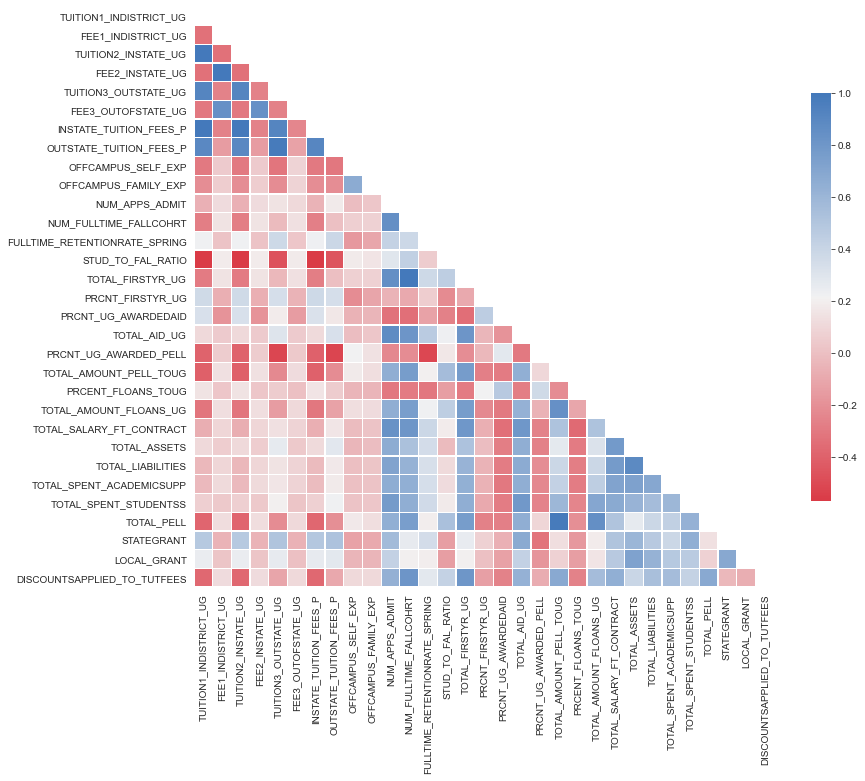

In [16]:
corr = numdata.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

# Find Colinear Columns
Suggested colinear columns to drop

In [17]:
cor_matrix=numdata.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


['TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES']


# Drop Colinear Columns 

In [37]:
def drop_colinear_cols():
    global data
    data = pd.read_csv("finaldata.csv")
    data.drop([col for col in ["StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT",
                               "COUNSELING_SERVICES","EMPLOYMENT_SERVICE",
           "ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN","ATHASSOC",
           'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 
            'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 
            'NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG',
            'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES']
               if col in data], axis=1, inplace=True)
    print("Name of Dataframe: data")
    return data.head()

In [38]:
drop_colinear_cols()

Name of Dataframe: data


,UNITID,TYPE,FORPROFIT,TUITVARY,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT,Highest_Bachelor,STATE_SOUTH
0,100654,1,0,1,1,8610,1414,3090,3440,0,9855,54,18,32,87,71,19916507,75,1,0,278440664,7257779,27527791,176182,0,0,1
1,100706,1,0,1,1,9730,1608,4076,4076,0,5793,82,19,19,72,24,8533685,39,1,0,521103730,12878882,20821717,109283,0,0,1
2,100724,1,0,1,1,8328,2740,4228,4228,0,7027,62,15,27,93,74,13341998,78,1,0,325537085,12928881,15714772,170200,0,0,1
3,100751,1,0,1,0,10780,840,4620,5692,1,39560,87,20,21,67,17,26353781,36,1,0,4881510109,103079114,60453485,772030,0,0,1
4,100830,1,0,1,0,7992,868,3830,3830,0,4606,70,16,13,77,47,11282206,54,1,0,184716313,4592684,7303651,105571,0,0,1


In [39]:
data.columns

Index(['UNITID', 'TYPE', 'FORPROFIT', 'TUITVARY', 'BOARD',
       'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP',
       'OFFCAMPUS_FAMILY_EXP', 'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT',
       'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TEACHER_CERT',
       'TUITION_GURANTEE', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT',
       'Highest_Bachelor', 'STATE_SOUTH'],
      dtype='object')

In [40]:
print(data.shape)

(1240, 27)


In [41]:
data.drop("UNITID",axis=1,inplace=True)

In [42]:
data.columns

Index(['TYPE', 'FORPROFIT', 'TUITVARY', 'BOARD', 'TUITION1_INDISTRICT_UG',
       'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP',
       'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT',
       'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TEACHER_CERT',
       'TUITION_GURANTEE', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT',
       'Highest_Bachelor', 'STATE_SOUTH'],
      dtype='object')

In [43]:
data.head()

,TYPE,FORPROFIT,TUITVARY,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT,Highest_Bachelor,STATE_SOUTH
0,1,0,1,1,8610,1414,3090,3440,0,9855,54,18,32,87,71,19916507,75,1,0,278440664,7257779,27527791,176182,0,0,1
1,1,0,1,1,9730,1608,4076,4076,0,5793,82,19,19,72,24,8533685,39,1,0,521103730,12878882,20821717,109283,0,0,1
2,1,0,1,1,8328,2740,4228,4228,0,7027,62,15,27,93,74,13341998,78,1,0,325537085,12928881,15714772,170200,0,0,1
3,1,0,1,0,10780,840,4620,5692,1,39560,87,20,21,67,17,26353781,36,1,0,4881510109,103079114,60453485,772030,0,0,1
4,1,0,1,0,7992,868,3830,3830,0,4606,70,16,13,77,47,11282206,54,1,0,184716313,4592684,7303651,105571,0,0,1


In [44]:
data.shape

(1240, 26)

In [45]:
print(np.corrcoef(data["TUITION1_INDISTRICT_UG"],data["TYPE"]))
print(np.corrcoef(data["TUITION1_INDISTRICT_UG"],data["TUITVARY"]))
print(np.corrcoef(data["TYPE"],data["TUITVARY"]))

[[ 1.         -0.77129441]
 [-0.77129441  1.        ]]
[[ 1.         -0.73996671]
 [-0.73996671  1.        ]]
[[1.         0.96635919]
 [0.96635919 1.        ]]


# Dropping more columns 

Private universities have fixed tution for out of state students 

In [46]:
data.drop("TUITVARY",axis=1,inplace=True)

<AxesSubplot:>

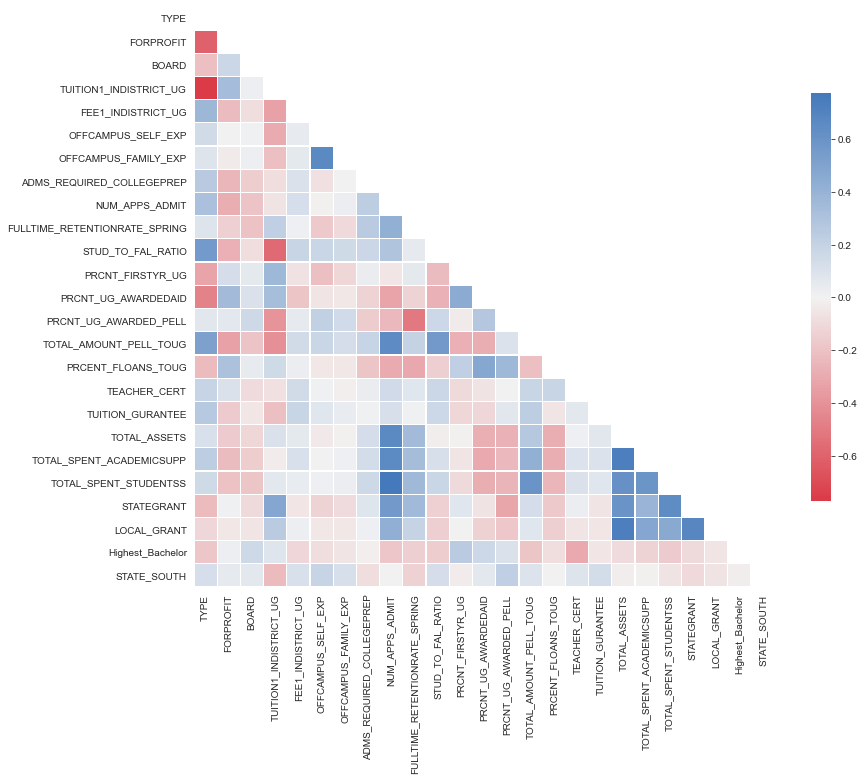

In [47]:
corr = data.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

In [48]:
cor_matrix=data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


[]


# VIF 

In [49]:
data.head()

,TYPE,FORPROFIT,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT,Highest_Bachelor,STATE_SOUTH
0,1,0,1,8610,1414,3090,3440,0,9855,54,18,32,87,71,19916507,75,1,0,278440664,7257779,27527791,176182,0,0,1
1,1,0,1,9730,1608,4076,4076,0,5793,82,19,19,72,24,8533685,39,1,0,521103730,12878882,20821717,109283,0,0,1
2,1,0,1,8328,2740,4228,4228,0,7027,62,15,27,93,74,13341998,78,1,0,325537085,12928881,15714772,170200,0,0,1
3,1,0,0,10780,840,4620,5692,1,39560,87,20,21,67,17,26353781,36,1,0,4881510109,103079114,60453485,772030,0,0,1
4,1,0,0,7992,868,3830,3830,0,4606,70,16,13,77,47,11282206,54,1,0,184716313,4592684,7303651,105571,0,0,1


# Removing dependent variable and only using predictors
VIF is affected by the predictors in it
Seperating into  different data when removing any predictors

In [50]:
data_vif = data.drop("FULLTIME_RETENTIONRATE_SPRING",axis=1,inplace=False)

In [51]:
data_vif.columns

Index(['TYPE', 'FORPROFIT', 'BOARD', 'TUITION1_INDISTRICT_UG',
       'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP',
       'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TEACHER_CERT',
       'TUITION_GURANTEE', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT',
       'Highest_Bachelor', 'STATE_SOUTH'],
      dtype='object')

In [52]:
def vif_function(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                          for i in range(len(dataframe.columns))]
    userinput = input("Do you want to display all columns VIF :")
    inputyes = ["Yes","yes","YES","Y","y"]
    inputno = ["N","n","No","NO"]
    if userinput in inputyes:
        pd.set_option('max_rows', None)
    else:
        pd.set_option("max_rows",20)
        pass
    print(vif_data)
    userinput2 = int(input("What is your Maximum VIF VALUE:"))
    valuesover = []
    for x, y in vif_data.iterrows():
        if (y[1]) >=userinput2:
            valuesover.append(y[0])
    return valuesover

In [53]:
vif_function(data_vif)

Do you want to display all columns VIF :yes
                      feature        VIF
0                        TYPE   6.938238
1                   FORPROFIT   3.254483
2                       BOARD   2.329886
3      TUITION1_INDISTRICT_UG  13.996255
4          FEE1_INDISTRICT_UG   2.829372
5          OFFCAMPUS_SELF_EXP  10.866531
6        OFFCAMPUS_FAMILY_EXP  10.481144
7   ADMS_REQUIRED_COLLEGEPREP   1.919112
8              NUM_APPS_ADMIT   7.301856
9           STUD_TO_FAL_RATIO  18.386838
10           PRCNT_FIRSTYR_UG  18.657911
11        PRCNT_UG_AWARDEDAID  44.631792
12      PRCNT_UG_AWARDED_PELL  13.978227
13     TOTAL_AMOUNT_PELL_TOUG   5.179235
14         PRCENT_FLOANS_TOUG  16.854000
15               TEACHER_CERT   9.026586
16           TUITION_GURANTEE   1.232775
17               TOTAL_ASSETS   0.004958
18   TOTAL_SPENT_ACADEMICSUPP   3.132531
19      TOTAL_SPENT_STUDENTSS   5.805433
20                 STATEGRANT   5.924499
21                LOCAL_GRANT  -0.063545
22           

['TUITION1_INDISTRICT_UG',
 'OFFCAMPUS_SELF_EXP',
 'OFFCAMPUS_FAMILY_EXP',
 'STUD_TO_FAL_RATIO',
 'PRCNT_FIRSTYR_UG',
 'PRCNT_UG_AWARDEDAID',
 'PRCNT_UG_AWARDED_PELL',
 'PRCENT_FLOANS_TOUG']

In [56]:
data_vif2 = data.drop(['TUITION1_INDISTRICT_UG',
 'OFFCAMPUS_SELF_EXP',
 'OFFCAMPUS_FAMILY_EXP',
 'STUD_TO_FAL_RATIO',
 'PRCNT_FIRSTYR_UG',
 'PRCNT_UG_AWARDEDAID',
 'PRCNT_UG_AWARDED_PELL',
 'PRCENT_FLOANS_TOUG',"FULLTIME_RETENTIONRATE_SPRING"],axis=1,inplace=False)

In [57]:
vif_function(data_vif2)

Do you want to display all columns VIF :yes
                      feature       VIF
0                        TYPE  4.212359
1                   FORPROFIT  2.783915
2                       BOARD  2.015907
3          FEE1_INDISTRICT_UG  2.627178
4   ADMS_REQUIRED_COLLEGEPREP  1.759462
5              NUM_APPS_ADMIT  6.784833
6      TOTAL_AMOUNT_PELL_TOUG  4.194457
7                TEACHER_CERT  5.864141
8            TUITION_GURANTEE  1.228220
9                TOTAL_ASSETS  0.004855
10   TOTAL_SPENT_ACADEMICSUPP  3.077222
11      TOTAL_SPENT_STUDENTSS  5.643987
12                 STATEGRANT  4.909465
13                LOCAL_GRANT -0.061319
14           Highest_Bachelor  1.191334
15                STATE_SOUTH  1.735795
What is your Maximum VIF VALUE:10


[]

In [62]:
data_vif2.head()

,TYPE,FORPROFIT,BOARD,FEE1_INDISTRICT_UG,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT,Highest_Bachelor,STATE_SOUTH
0,1,0,1,1414,0,9855,19916507,1,0,278440664,7257779,27527791,176182,0,0,1
1,1,0,1,1608,0,5793,8533685,1,0,521103730,12878882,20821717,109283,0,0,1
2,1,0,1,2740,0,7027,13341998,1,0,325537085,12928881,15714772,170200,0,0,1
3,1,0,0,840,1,39560,26353781,1,0,4881510109,103079114,60453485,772030,0,0,1
4,1,0,0,868,0,4606,11282206,1,0,184716313,4592684,7303651,105571,0,0,1


In [61]:
data_vif2.shape

(1240, 16)

<AxesSubplot:>

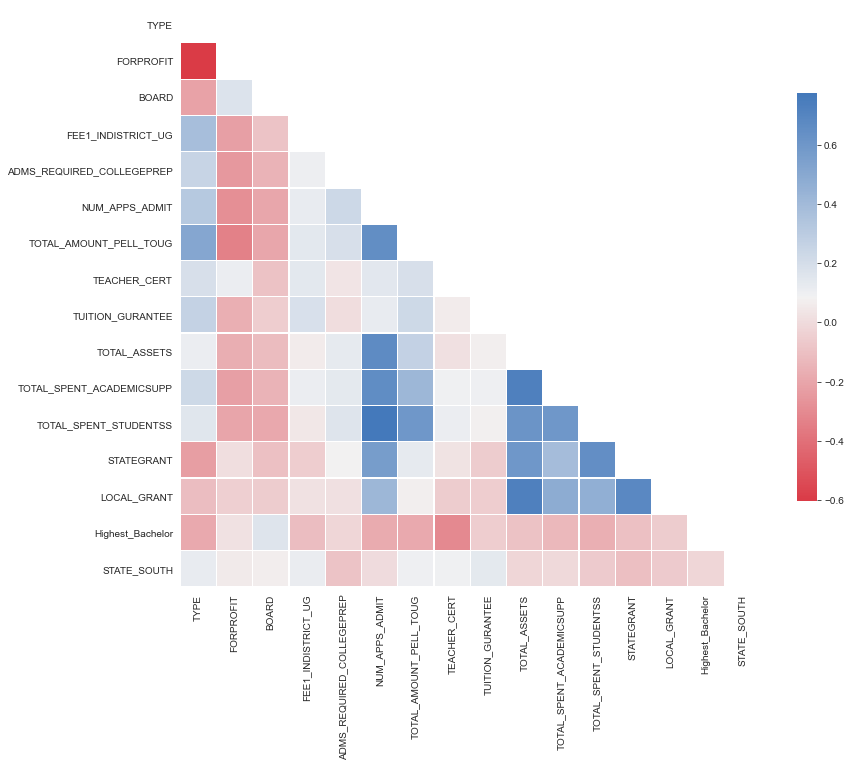

In [63]:
corr = data_vif2.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

# Predictors

* TYPE: 1 Public, 0 private
* FOR PROFIT: 1 For profit, 0 No
* BOARD: 1 offer board, 0 no
* FEE 1_INDISTRICT UG : In-district required fees for full-time undergraduates
* ADMS_REQUIRED COLLEGEPREP: 1 = Required college prep completion, 0 did not 
* NUM APPS_ADMIT: Number of Applicants admitted  
* TOTAL_AMOUNT_PELL_TOUG: Total amount of Pell Grants to UnderGraduates  
* Teacher cert: 1 = if offers teacher cert, 0 if not
* TUITION_GURANTEE: 1 = Guarantees Tution will not rise over course of years in collee, 0 NO
* TOTAL ASSETS = Total assets of university 
* TOTAL_SPEND_ACADEMICSS: Total spend on academic support
* TOTAL_SPEND_STUDENTSS: Total spent on student support services
* STATE GRANT:Total Grants by state gov
* LOCAL GRANT: Total grants by local gov 
* Highest_Bachelor: 1= if Highest level of education is bachelor degree, 0 if post bachelor or higher
  All universities are at least Bachelor 
* SOUTH: 1 = if state is in south region by U.S census bureu, 0 if elsewhere 

In [ ]:
data_vif2.to_csv("datamodel.csv")